# The complete application code of the Brain Tumor Detection using CNN project

This is the complete code developed during the project realization

# 1. loading the reqired packages and libraries:

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
#from tensorflow.keras.preprocessing import image
# from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D, Dense

2024-06-17 20:15:29.349195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 20:15:29.349255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 20:15:29.350732: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. Uploading the Dataset

The dataset is available in Kaggle https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?select=Testing, I have also attached this dataset in the zipped file 

In [2]:
# Define the directory paths for the training and testing datasets
data_dir_train = r'/kaggle/input/dataset/Training'
data_dir_test = r'/kaggle/input/dataset/Testing'
# Define the labels for the classification task
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
# Resizing the images and InitializING lists to hold thetraining and testing data and their corresponding labels
image_size = 150
X_train = []
Y_train = []
X_test = []
Y_test = []

In [3]:
# Load training data
for i in labels:
    Path_of_folder = os.path.join(data_dir_train,i)
    for j in os.listdir(Path_of_folder):
        image = cv2.imread(os.path.join(Path_of_folder,j))
        image = cv2.resize(image,(image_size,image_size))
        X_train.append(image),Y_train.append(i)

In [4]:
# Load testing data
for i in labels:
    Path_of_folder = os.path.join(data_dir_test,i)
    for j in os.listdir(Path_of_folder):
        image = cv2.imread(os.path.join(Path_of_folder,j))
        image = cv2.resize(image,(image_size,image_size))
        X_test.append(image),Y_test.append(i) 

# 3. Exploring the imported by vizualizing them 

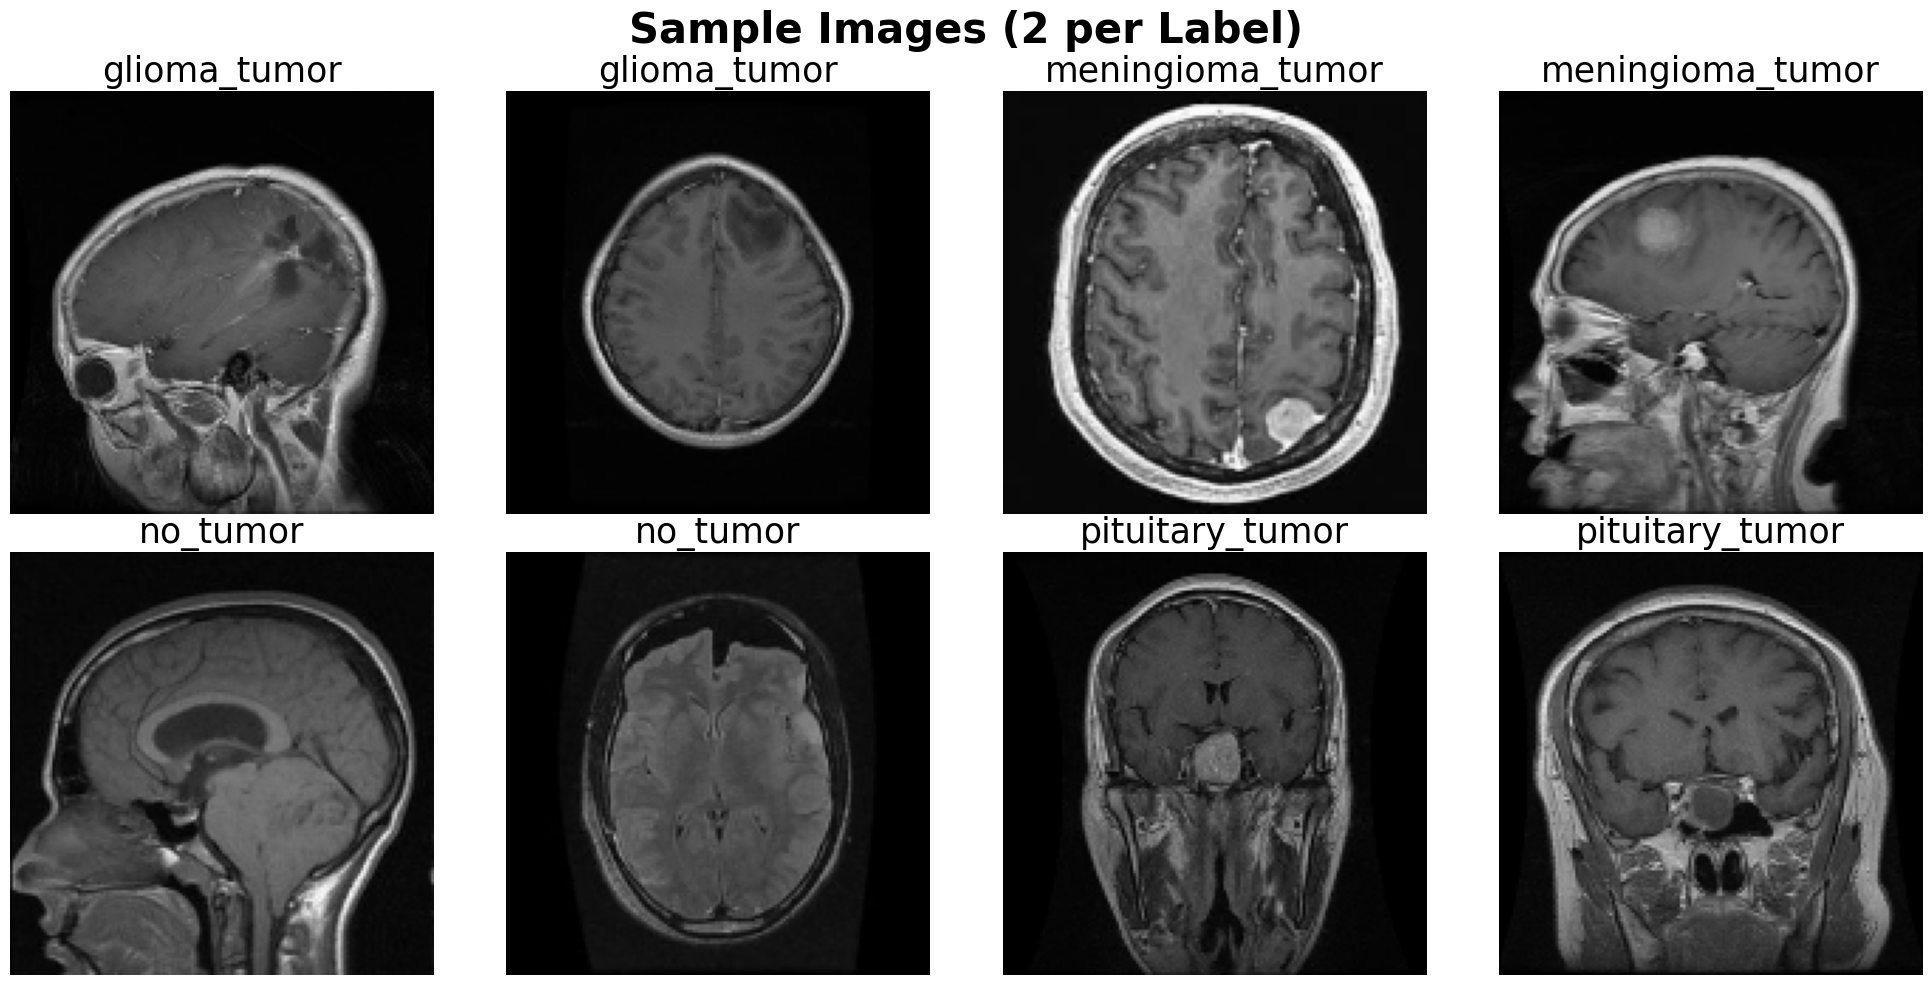

In [5]:
# Define the number of images per label to display
images_per_label = 2

# Creating the figures
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Set the title for the entire figure
fig.suptitle('Sample Images (2 per Label)', fontsize=30, fontweight='bold')

# Initialize counters for subplot positions
row, col = 0, 0


# Iterate over each label and display images
for label in labels:
    count = 0  # Track the number of images displayed for the current label
    for idx in range(len(X_train)):
        if Y_train[idx] == label:
            # Display the image
            ax[row, col].imshow(X_train[idx])
            ax[row, col].set_title(label, fontsize=25)
            ax[row, col].axis('off')
            count += 1
            
            # Move to the next subplot position
            col += 1
            if col == 4:
                col = 0
                row += 1
            
            # Break the loop after displaying the required number of images per label
            if count == images_per_label:
                break

# Adjust layout and spacing
plt.tight_layout()
plt.show()


# 4. Preprocessing the dataset 

### a-  Normalizing and Converting lists to numpy arrays

In [6]:
# Normalize and Convert lists to numpy arrays
X_train = np.array(X_train, dtype='float32') / 255.0  # Normalize pixel values to [0, 1]
X_test = np.array(X_test, dtype='float32') / 255.0    # Normalize pixel values to [0, 1]
Y_train = np.array(Y_train)  # Convert labels to NumPy array (dtype inferred)
Y_test = np.array(Y_test)    # Convert labels to NumPy array (dtype inferred)

In [7]:
print(f'X_train shape: {(X_train).shape}\n'
      f'y_train shape: {(Y_train).shape}\n'
      f'X_test shape: {(X_test).shape}\n'
      f'y_test shape: {(Y_test).shape}')

X_train shape: (2870, 150, 150, 3)
y_train shape: (2870,)
X_test shape: (394, 150, 150, 3)
y_test shape: (394,)


### b-  Converting labels to categorical

In [8]:
# Convert labels to categorical
Y_train_new = [labels.index(i) for i in Y_train]
Y_train = tf.keras.utils.to_categorical(Y_train_new)

Y_test_new = [labels.index(i) for i in Y_test]
Y_test = tf.keras.utils.to_categorical(Y_test_new)

### c. Shuffling the data

In [9]:
# Shuffle data
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

### d. Splitting the dataset

In [10]:
# Split data into training and testing sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15) # it was 0.2

In [11]:
print("X_train:", (X_train).shape)
print("Y_train:", Y_train.shape)
print("X_val:", X_val.shape)
print("Y_val:", Y_val.shape)

X_train: (2439, 150, 150, 3)
Y_train: (2439, 4)
X_val: (431, 150, 150, 3)
Y_val: (431, 4)


# 5. CNN architecture models design

## a. Model 1: Elementary sequential CNN with dropout

In [12]:
# Define the model1
model1 = Sequential()

# Add the first convolutional layer
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  
model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))  
model1.add(Dropout(0.3))

# Add the second convolutional layer
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))

# Flatten the output
model1.add(Flatten())

# Add a dense layer
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.3))

# Add the output layer
model1.add(Dense(4, activation='softmax'))  # Using softmax for multi-class classification

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Compiling the model 1

In [13]:
# Compile the model1
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

### Printing the summary of the model 1 

In [14]:
# Print the summary of the model1
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 39200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    10,035,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,074,340 (38.43 MB)

 Trainable params: 10,074,340 (38.43 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model 1

In [15]:
# Fit the model1 to the training data
history1 = model1.fit(X_train, Y_train, epochs=100, batch_size=32,  validation_data=(X_val, Y_val))    

Epoch 1/100


2024-06-17 20:16:21.390925: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 7.01362, expected 6.05938
2024-06-17 20:16:21.390986: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.59738, expected 5.64314
2024-06-17 20:16:21.391001: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.60386, expected 6.64961
2024-06-17 20:16:21.391018: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.47181, expected 6.51757
2024-06-17 20:16:21.391031: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.76316, expected 6.80892
2024-06-17 20:16:21.391043: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.80827, expected 5.85402
2024-06-17 20:16:21.391054: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.93282, expected 5.97858
2024-06-17 20:16:21.391065: E external/local_xla/xla/se

 5/77 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.2775 - loss: 1.3840

I0000 00:00:1718655388.856963     409 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4488 - loss: 1.2166

2024-06-17 20:16:32.800219: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 6.57614, expected 5.75489
2024-06-17 20:16:32.800288: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.76368, expected 5.94244
2024-06-17 20:16:32.800307: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.49966, expected 5.67842
2024-06-17 20:16:32.800315: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 6.85806, expected 6.03681
2024-06-17 20:16:32.800328: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 17: 6.91486, expected 6.09361
2024-06-17 20:16:32.800335: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 24: 6.71464, expected 5.89339
2024-06-17 20:16:32.800343: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 25: 6.41763, expected 5.59639
2024-06-17 20:16:32.800351: E external/local_xla/xl

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.4504 - loss: 1.2140

2024-06-17 20:16:37.832594: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21904: 7.191, expected 6.20221
2024-06-17 20:16:37.832657: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21905: 8.00769, expected 7.01891
2024-06-17 20:16:37.832668: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21906: 7.11423, expected 6.12544
2024-06-17 20:16:37.832677: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21908: 8.33523, expected 7.34645
2024-06-17 20:16:37.832686: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21909: 8.2094, expected 7.22062
2024-06-17 20:16:37.832695: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21910: 8.38192, expected 7.39314
2024-06-17 20:16:37.832704: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21911: 8.26732, expected 7.27854
2024-06-17 20:16:37.832712: E 

77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.4512 - loss: 1.2128 - val_accuracy: 0.5916 - val_loss: 0.9402
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6273 - loss: 0.8772 - val_accuracy: 0.6752 - val_loss: 0.7738
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7154 - loss: 0.7072 - val_accuracy: 0.7146 - val_loss: 0.6616
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7528 - loss: 0.5962 - val_accuracy: 0.7773 - val_loss: 0.5779
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8131 - loss: 0.4876 - val_accuracy: 0.7216 - val_loss: 0.6557
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8454 - loss: 0.4094 - val_accuracy: 0.7796 - val_loss: 0.5450
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8600 - loss: 0.3704 - val_accuracy: 0.7981 - val_loss: 0.5087
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8960 - loss: 0.2775 - val_accuracy: 0.8237 - val

### Ploting training and validation loss & accuracy

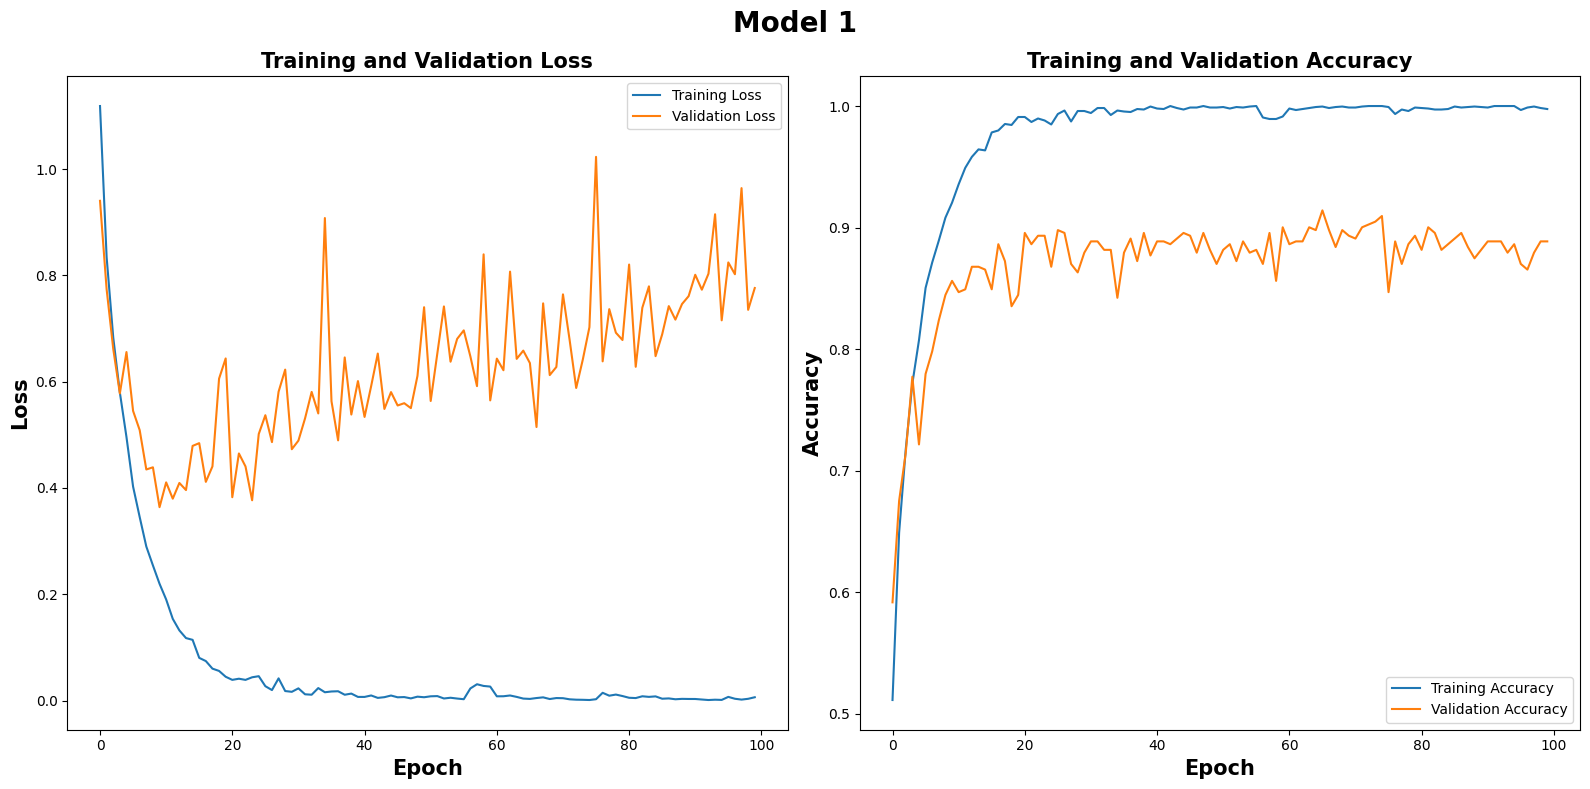

In [16]:
import matplotlib.pyplot as plt

# Drawing the training and validation graphs, loss and accuracy
# Design the figure and the 1x2 grid of subplots as we want it

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Drawing the training and validation loss which will be on the first subplot
fig.suptitle('Model 1', fontsize=20, fontweight='bold')


ax1.plot(history1.history['loss'], label='Training Loss')
ax1.plot(history1.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss',fontsize=15, fontweight='bold')
ax1.set_xlabel('Epoch',fontsize=15, fontweight='bold')
ax1.set_ylabel('Loss',fontsize=15, fontweight='bold')
ax1.legend()

# Drawing the training and validation accuracy that will be on the second subplot
ax2.plot(history1.history['accuracy'], label='Training Accuracy')
ax2.plot(history1.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy',fontsize=15, fontweight='bold')
ax2.set_xlabel('Epoch',fontsize=15, fontweight='bold')
ax2.set_ylabel('Accuracy',fontsize=15, fontweight='bold')
ax2.legend()

# Save the figure as an image file
plt.savefig('model1_performance.png')

# Visualize the designed plots
plt.tight_layout()
plt.show()


### Testing and evaluating the model 1

In [17]:
# finding the validation accuracy of the model 1 on the validation dataset
val_loss, val_acc = model1.evaluate(X_val, Y_val) 
print("The validation accuracy is: {:.2f}%".format(val_acc * 100))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8829 - loss: 0.8148
The validation accuracy is: 88.86%


In [18]:
# Evaluate the model on the testing set
val_loss, val_acc = model1.evaluate(X_test, Y_test) 
print("The accuracy is: {:.2f}%".format(val_acc * 100))

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3428 - loss: 16.6625

2024-06-17 20:22:37.631947: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.84546, expected 6.04458
2024-06-17 20:22:37.632012: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 28: 6.53794, expected 5.73706
2024-06-17 20:22:37.632027: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 6.51572, expected 5.71485
2024-06-17 20:22:37.632042: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 37: 6.55851, expected 5.75764
2024-06-17 20:22:37.632058: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 38: 6.92338, expected 6.1225
2024-06-17 20:22:37.632069: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44: 6.79073, expected 5.98985
2024-06-17 20:22:37.632079: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 53: 6.81789, expected 6.01701
2024-06-17 20:22:37.632090: E external/local_xla/

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5244 - loss: 11.8363
The accuracy is: 73.60%


In [19]:
# Finding the Predictions
y_pred_prob = model1.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [20]:
# Confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)
cm

array([[ 18,  24,  48,  10],
       [  2, 104,   3,   6],
       [  1,   0, 104,   0],
       [  2,   5,   3,  64]])

In [21]:
# Finding the accuracy
accuracy = accuracy_score(np.argmax(Y_test, axis=1), y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", f"{accuracy_percentage:.2f}%")


Accuracy: 73.60%


In [22]:
# Finding the Precision
precision = precision_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.7525370701673236


In [23]:
# Finding the Recall
recall = recall_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.7360406091370558


In [24]:
# F-score
f_score = f1_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("F-Score:", f_score)

F-Score: 0.6859599598672669


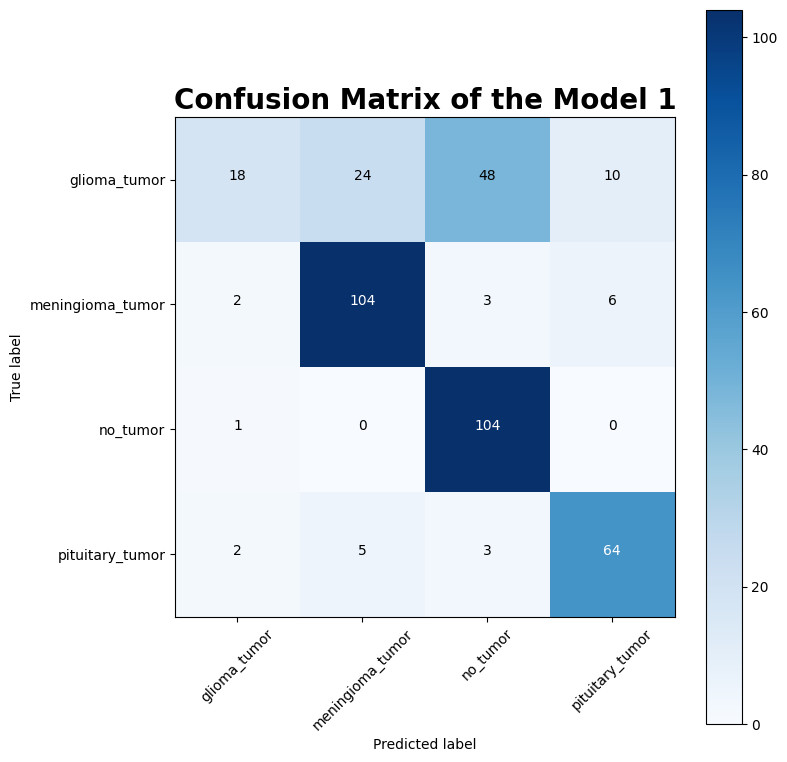

In [25]:
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of the Model 1', fontsize=20, fontweight='bold')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    # Save the figure as an image file
plt.savefig('model1_Matrixperformance.png')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## b- Model 2: Deep CNN with multiple dropout layer

In [26]:
# Define the model2
model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64, (5, 5), activation='relu', input_shape=(150, 150, 3)))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Dropout(0.25))  # Add dropout layer

# Convolutional layer 2
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Dropout(0.25))  # Add dropout layer

# Convolutional layer 3
model2.add(Conv2D(128, (4, 4), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))  # Increase dropout rate

# Convolutional layer 4
model2.add(Conv2D(128, (4, 4), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))  # Increase dropout rate

# Flatten the output
model2.add(Flatten())

# Dense layer 1
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))  # Add dropout layer to dense layer

# Dense layer 2
model2.add(Dense(256, activation='relu'))  # Add an additional dense layer
model2.add(Dropout(0.5))  # Add dropout layer

# Output layer
model2.add(Dense(4, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Compiling the model 2

In [27]:
# Compile the model2
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])


### Printing the model 2 summary 

In [28]:
# print the summary of the model2
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 146, 146, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 44, 44, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 2, 2, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 699,204 (2.67 MB)

 Trainable params: 699,204 (2.67 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model 2

In [29]:
# Fit the mode2 to the training data
history2 = model2.fit( 
                        X_train, Y_train,
                        epochs=100,  
                        batch_size=32,  
                        validation_data=(X_val, Y_val),
         )


Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 176ms/step - accuracy: 0.2721 - loss: 1.3824 - val_accuracy: 0.3039 - val_loss: 1.3723
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2924 - loss: 1.3646 - val_accuracy: 0.4617 - val_loss: 1.3663
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3096 - loss: 1.3621 - val_accuracy: 0.4849 - val_loss: 1.3465
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3250 - loss: 1.3446 - val_accuracy: 0.5081 - val_loss: 1.2408
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4623 - loss: 1.2319 - val_accuracy: 0.5128 - val_loss: 1.1149
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4935 - loss: 1.1438 - val_accuracy: 0.5244 - val_loss: 1.0696
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5060 - loss: 1.0764 - val_accuracy: 0.5777 - val_loss: 0.9908
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5501 - loss: 1.0265 - val_accuracy: 

### Ploting the training and validation loss & accuracy 

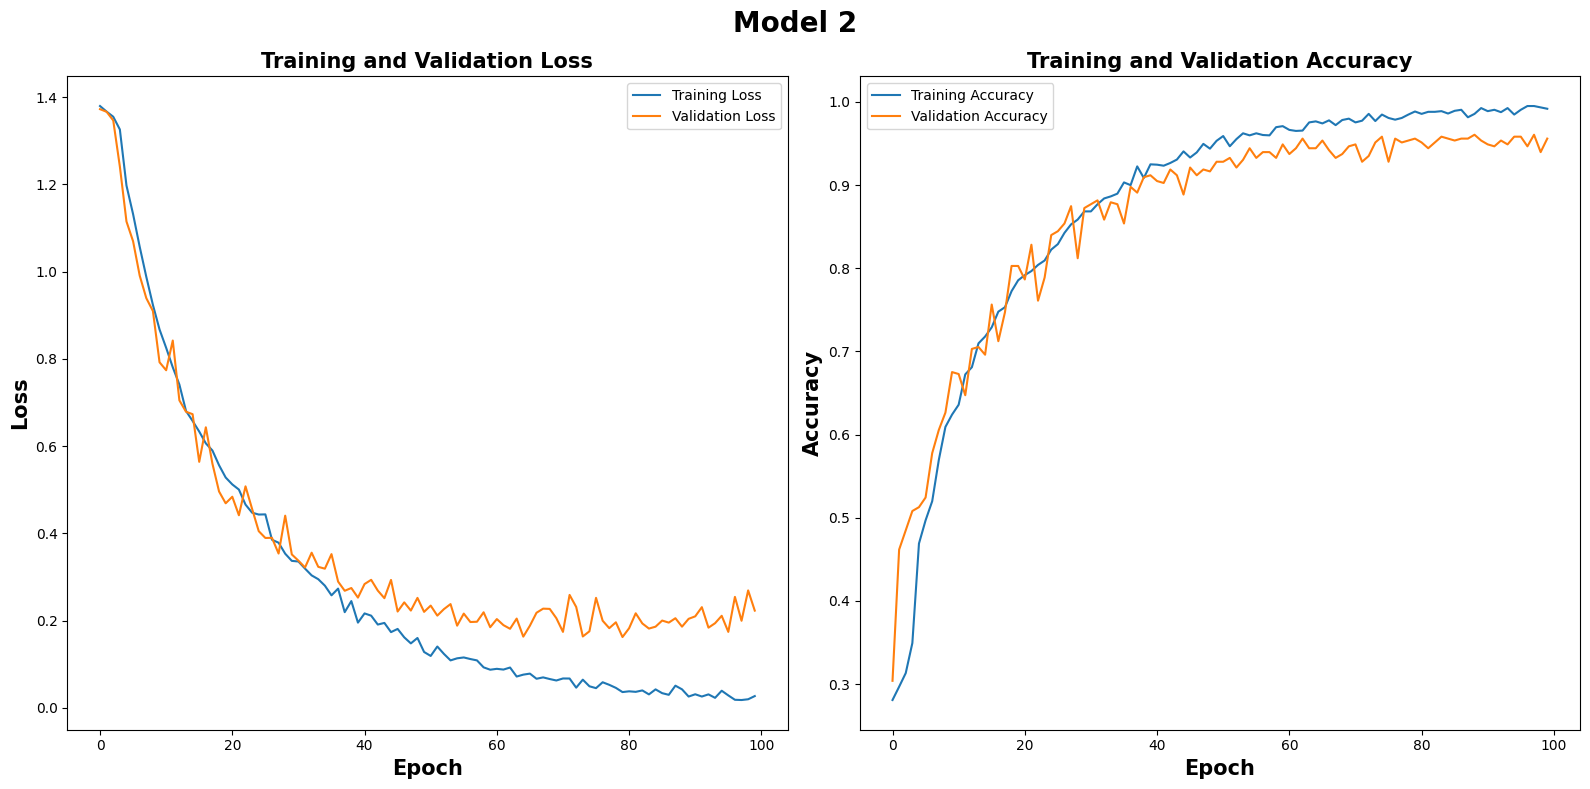

In [30]:
import matplotlib.pyplot as plt

# Drawing the training and validation graphs, loss and accuracy
# Design the figure and the 1x2 grid of subplots as we want it
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Drawing the training and validation loss which will be on the first subplot
fig.suptitle('Model 2', fontsize=20, fontweight='bold')


ax1.plot(history2.history['loss'], label='Training Loss')
ax1.plot(history2.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss',fontsize=15, fontweight='bold')
ax1.set_xlabel('Epoch',fontsize=15, fontweight='bold')
ax1.set_ylabel('Loss',fontsize=15, fontweight='bold')
ax1.legend()

# Drawing the training and validation accuracy that will be on the second subplot
ax2.plot(history2.history['accuracy'], label='Training Accuracy')
ax2.plot(history2.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy',fontsize=15, fontweight='bold')
ax2.set_xlabel('Epoch',fontsize=15, fontweight='bold')
ax2.set_ylabel('Accuracy',fontsize=15, fontweight='bold')
ax2.legend()

# Save the figure as an image file
plt.savefig('model2_performance.png')

# Visualize the designed plots
plt.tight_layout()
plt.show()

### Testing and evaluating the model 2

In [32]:
# finding the validation accuracy of the model 2 on the validation dataset
val_loss, val_acc = model2.evaluate(X_val, Y_val) 
print("The validation accuracy is: {:.2f}%".format(val_acc * 100))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9552 - loss: 0.2111
The validation accuracy is: 95.59%


In [33]:
# finding the accuracy of the model 2 on the test dataset
val_loss, val_acc = model2.evaluate(X_test, Y_test) 
print("The accuracy is: {:.2f}%".format(val_acc * 100))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5537 - loss: 4.4233
The accuracy is: 75.38%


In [34]:
# Predictions
y_pred_prob = model2.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [35]:
# Confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)
cm

array([[ 20,  52,  24,   4],
       [  0, 112,   3,   0],
       [  0,   2, 103,   0],
       [  0,   6,   6,  62]])

In [36]:
#accuracy
accuracy = accuracy_score(np.argmax(Y_test, axis=1), y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

Accuracy: 75.38071065989847


In [37]:
# Precision
precision = precision_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.8221343433221154


In [38]:
# Recall
recall = recall_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.7538071065989848


In [39]:
# F-score
f_score = f1_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("F-Score:", f_score)

F-Score: 0.7065566634049858


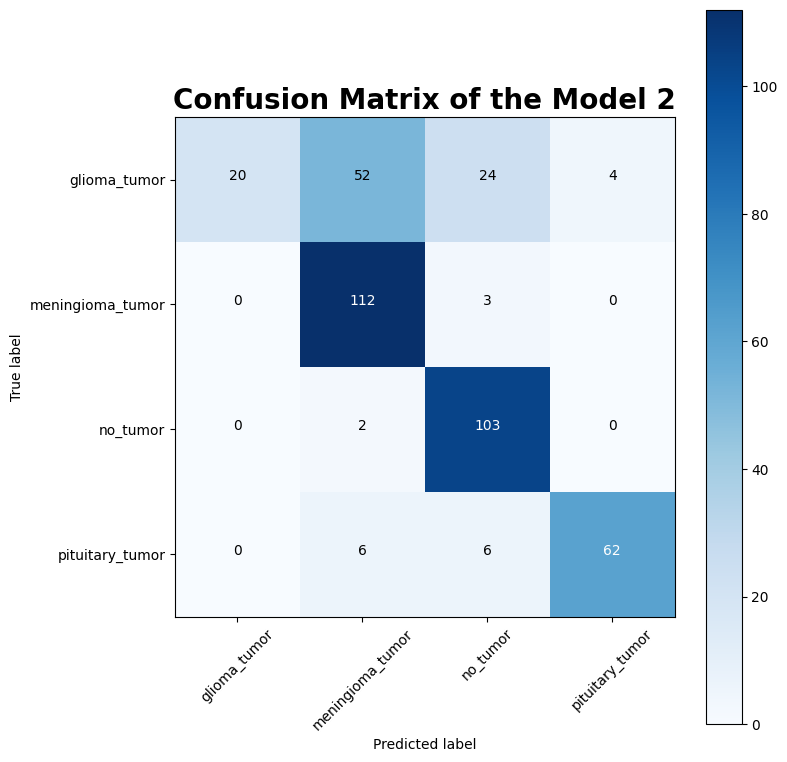

In [40]:
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of the Model 2', fontsize=20, fontweight='bold')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    # Save the figure as an image file
plt.savefig('model2_Matrixperformance.png')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## c. Model 3: CNN featuring several dense layers

In [41]:
# Define the model3
model3 = Sequential()

model3.add(Conv2D(64, (5,5), activation='relu', input_shape=(150,150,3)))
model3.add(Conv2D(32, (5,5), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.3))

model3.add(Conv2D(64, (5,5), activation='relu'))
model3.add(Conv2D(64, (5,5), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.3))

model3.add(Conv2D(256, (5,5), activation='relu'))
model3.add(Conv2D(128, (5,5), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(512, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(4, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Compiling the model 3

In [42]:
# Compile the model3
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

### Printing the summary of the mode 3

In [43]:
# Print the summary of the model1
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 146, 146, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 142, 142, 32)   │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 71, 71, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 71, 71, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 67, 67, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 63, 63, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 27, 27, 256)    │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 23, 23, 128)    │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     7,930,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,896,740 (37.75 MB)

 Trainable params: 9,896,740 (37.75 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model 3

In [44]:
# Fit the model1 to the training data
history3 = model3.fit(X_train, Y_train, epochs=100, batch_size=32,  validation_data=(X_val, Y_val))    

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 223ms/step - accuracy: 0.2879 - loss: 1.3550 - val_accuracy: 0.5777 - val_loss: 1.0175
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.6040 - loss: 0.9474 - val_accuracy: 0.6172 - val_loss: 0.8499
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.6555 - loss: 0.8125 - val_accuracy: 0.7309 - val_loss: 0.6626
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.7411 - loss: 0.6542 - val_accuracy: 0.7564 - val_loss: 0.5756
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.7862 - loss: 0.5235 - val_accuracy: 0.7889 - val_loss: 0.5137
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8488 - loss: 0.4095 - val_accuracy: 0.8585 - val_loss: 0.3851
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8909 - loss: 0.2955 - val_accuracy: 0.8840 - val_loss: 0.3398
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9218 - loss: 0.2307 - val_accuracy: 

### Plotting the training and validation loss & accuracy

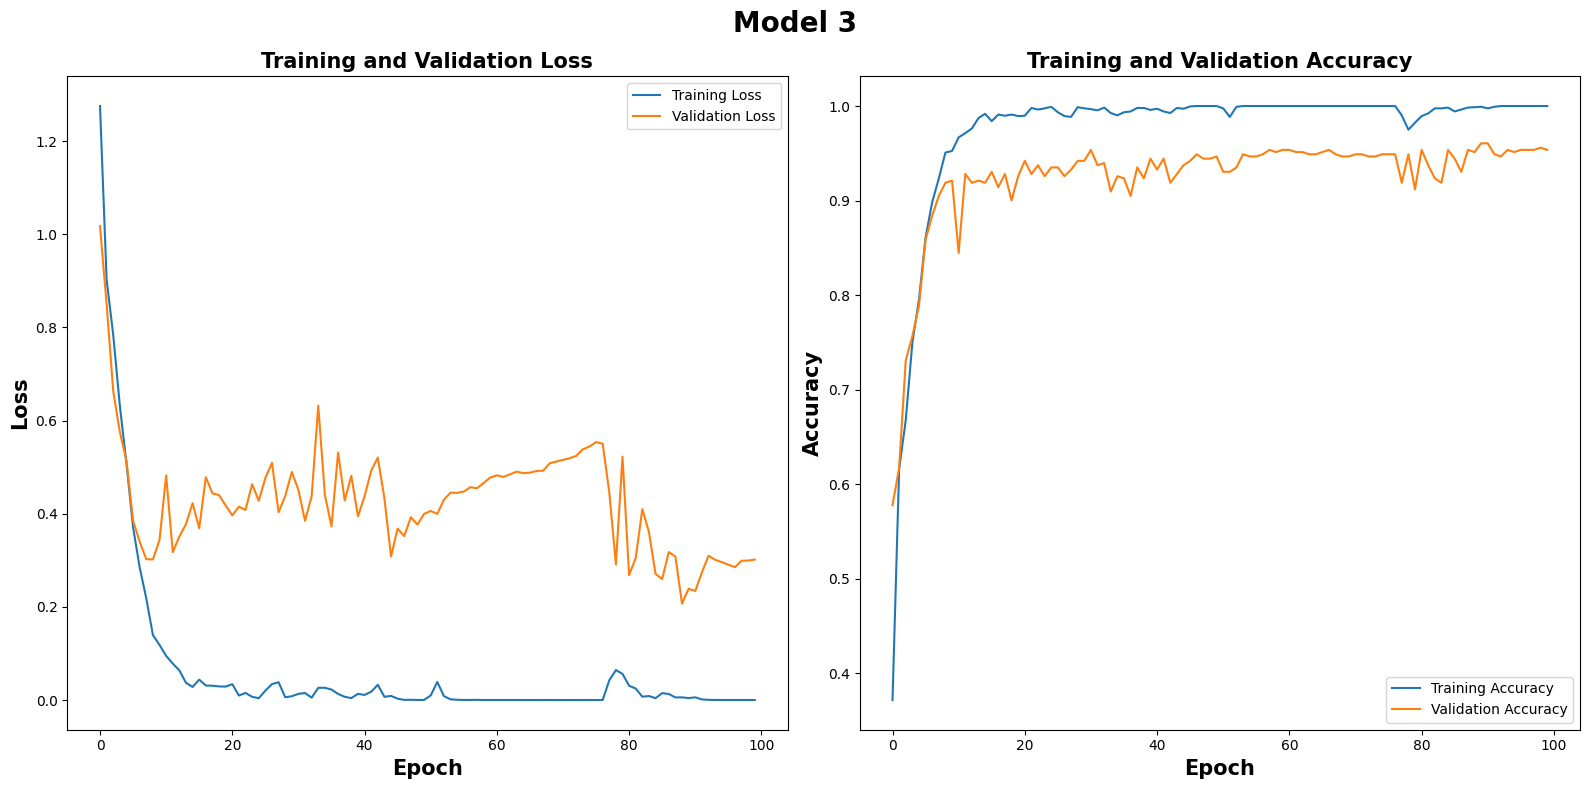

In [45]:
import matplotlib.pyplot as plt

# Drawing the training and validation graphs, loss and accuracy
# Design the figure and the 1x2 grid of subplots as we want it
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Set the title for the entire figure
fig.suptitle('Model 3', fontsize=20, fontweight='bold')

# Drawing the training and validation loss which will be on the first subplot
ax1.plot(history3.history['loss'], label='Training Loss')
ax1.plot(history3.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss',fontsize=15, fontweight='bold')
ax1.set_xlabel('Epoch',fontsize=15, fontweight='bold')
ax1.set_ylabel('Loss',fontsize=15, fontweight='bold')
ax1.legend()

# Drawing the training and validation accuracy that will be on the second subplot
ax2.plot(history3.history['accuracy'], label='Training Accuracy')
ax2.plot(history3.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy',fontsize=15, fontweight='bold')
ax2.set_xlabel('Epoch',fontsize=15, fontweight='bold')
ax2.set_ylabel('Accuracy',fontsize=15, fontweight='bold')
ax2.legend()

# Save the figure as an image file
plt.savefig('model3_performance.png')

# Visualize the designed plots
plt.tight_layout()
plt.show()


### Testing and evaluating the model 3

In [46]:
# finding the validation accuracy of the model 3 on the validation dataset
val_loss, val_acc = model3.evaluate(X_val, Y_val) 
print("The validation accuracy is: {:.2f}%".format(val_acc * 100))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9498 - loss: 0.3411
The validation accuracy is: 95.36%


In [47]:
# finding the accuracy of the model 3 on the test dataset
val_loss, val_acc = model3.evaluate(X_test, Y_test) 
print("The accuracy is: {:.2f}%".format(val_acc * 100))

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.5677 - loss: 9.2790
The accuracy is: 75.89%


In [48]:
# Predictions
y_pred_prob = model3.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [49]:
# Confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)
cm

array([[ 22,  41,  33,   4],
       [  1, 112,   2,   0],
       [  0,   1, 104,   0],
       [  0,   3,  10,  61]])

In [50]:
#accuracy
accuracy = accuracy_score(np.argmax(Y_test, axis=1), y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

Accuracy: 75.88832487309645


In [51]:
# Precision
precision = precision_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.8132617637658216


In [52]:
# Recall
recall = recall_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.7588832487309645


In [55]:
# Finding F-score
f_score = f1_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("F-Score:", f_score)

F-Score: 0.7142439906923658


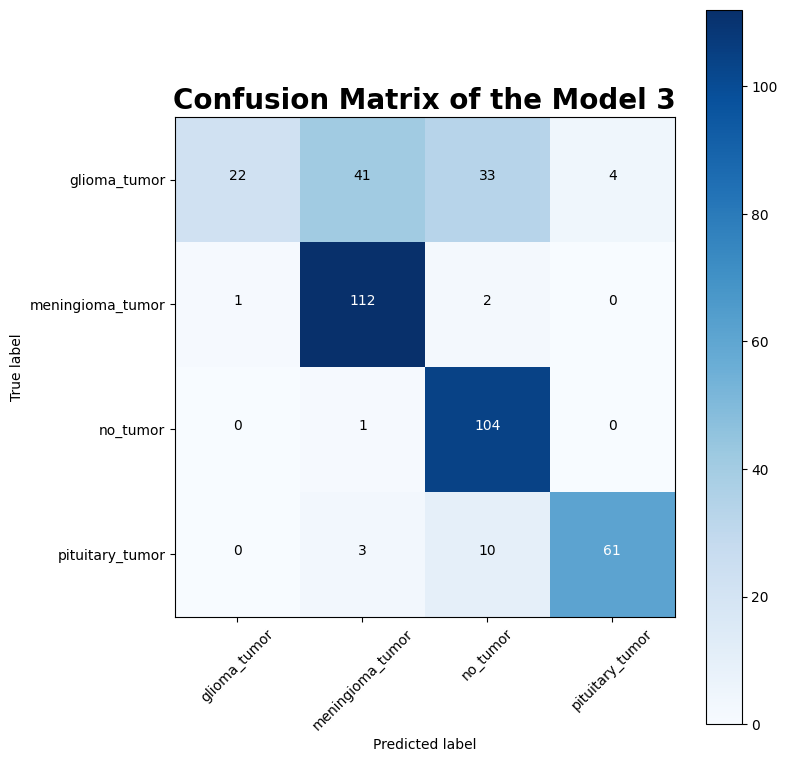

In [56]:
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of the Model 3', fontsize=20, fontweight='bold')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    # Save the figure as an image file
plt.savefig('model3_Matrixperformance.png')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## d. Model 4: VGG16-based Transfer Learning model

In [57]:
# create the model4
# Load the VGG16 model with pre-trained ImageNet weights, excluding the top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the initial layers of the base model
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

# Define the model4
model4 = Sequential()
model4.add(vgg_base)
model4.add(GlobalAveragePooling2D())

model4.add(Dense(512, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(256, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(4, activation='softmax')) 

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Compiling the model 4

In [58]:
# Compile the model1
model4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

### Printing the model 4 summary

In [59]:
# Print the summary of the model1
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

### Training the model 4

In [60]:
# Fit the model1 to the training data
history4 = model4.fit(X_train, Y_train, epochs=100, batch_size=32,  validation_data=(X_val, Y_val))    

Epoch 1/100


2024-06-17 20:45:53.945647: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.18794, expected 3.54228
2024-06-17 20:45:53.945723: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.14647, expected 4.50081
2024-06-17 20:45:53.945733: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.30074, expected 4.65509
2024-06-17 20:45:53.945741: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 4.91575, expected 4.27009
2024-06-17 20:45:53.945749: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 3.57367, expected 2.92801
2024-06-17 20:45:53.945757: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 4.05899, expected 3.41334
2024-06-17 20:45:53.945766: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 5.27592, expected 4.63026
2024-06-17 20:45:53.945774: E external/local_xla/xla

75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4378 - loss: 1.6400

2024-06-17 20:46:09.558622: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.25071, expected 3.54246
2024-06-17 20:46:09.558680: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.95812, expected 5.24987
2024-06-17 20:46:09.558694: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.97617, expected 4.26792
2024-06-17 20:46:09.558709: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.08142, expected 5.37316
2024-06-17 20:46:09.558725: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 5.14235, expected 4.43409
2024-06-17 20:46:09.558737: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 4.3596, expected 3.65134
2024-06-17 20:46:09.558748: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 4.30828, expected 3.60002
2024-06-17 20:46:09.558759: E external/local_xla/xla/s

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.4407 - loss: 1.6312

2024-06-17 20:46:16.583176: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.65636, expected 3.1437
2024-06-17 20:46:16.583236: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 3.72186, expected 3.20919
2024-06-17 20:46:16.583245: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 4.03432, expected 3.52165
2024-06-17 20:46:16.583253: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 3.78826, expected 3.2756
2024-06-17 20:46:16.583261: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 4.09676, expected 3.5841
2024-06-17 20:46:16.583269: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 26: 4.03057, expected 3.51791
2024-06-17 20:46:16.583276: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 3.68738, expected 3.17471
2024-06-17 20:46:16.583284: E external/local_xla/xla/

77/77 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - accuracy: 0.4421 - loss: 1.6270 - val_accuracy: 0.6914 - val_loss: 0.9255
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.7184 - loss: 0.8426 - val_accuracy: 0.5128 - val_loss: 1.7568
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.7824 - loss: 0.6804 - val_accuracy: 0.5986 - val_loss: 0.8910
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8342 - loss: 0.5272 - val_accuracy: 0.6427 - val_loss: 0.9228
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8560 - loss: 0.3947 - val_accuracy: 0.8608 - val_loss: 0.4970
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9076 - loss: 0.2769 - val_accuracy: 0.5777 - val_loss: 1.0094
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9252 - loss: 0.2141 - val_accuracy: 0.7053 - val_loss: 0.7288
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9303 - loss: 0.1771 - val_accuracy: 0.6659 - val

### Plotting the training and validation loss & accuracy

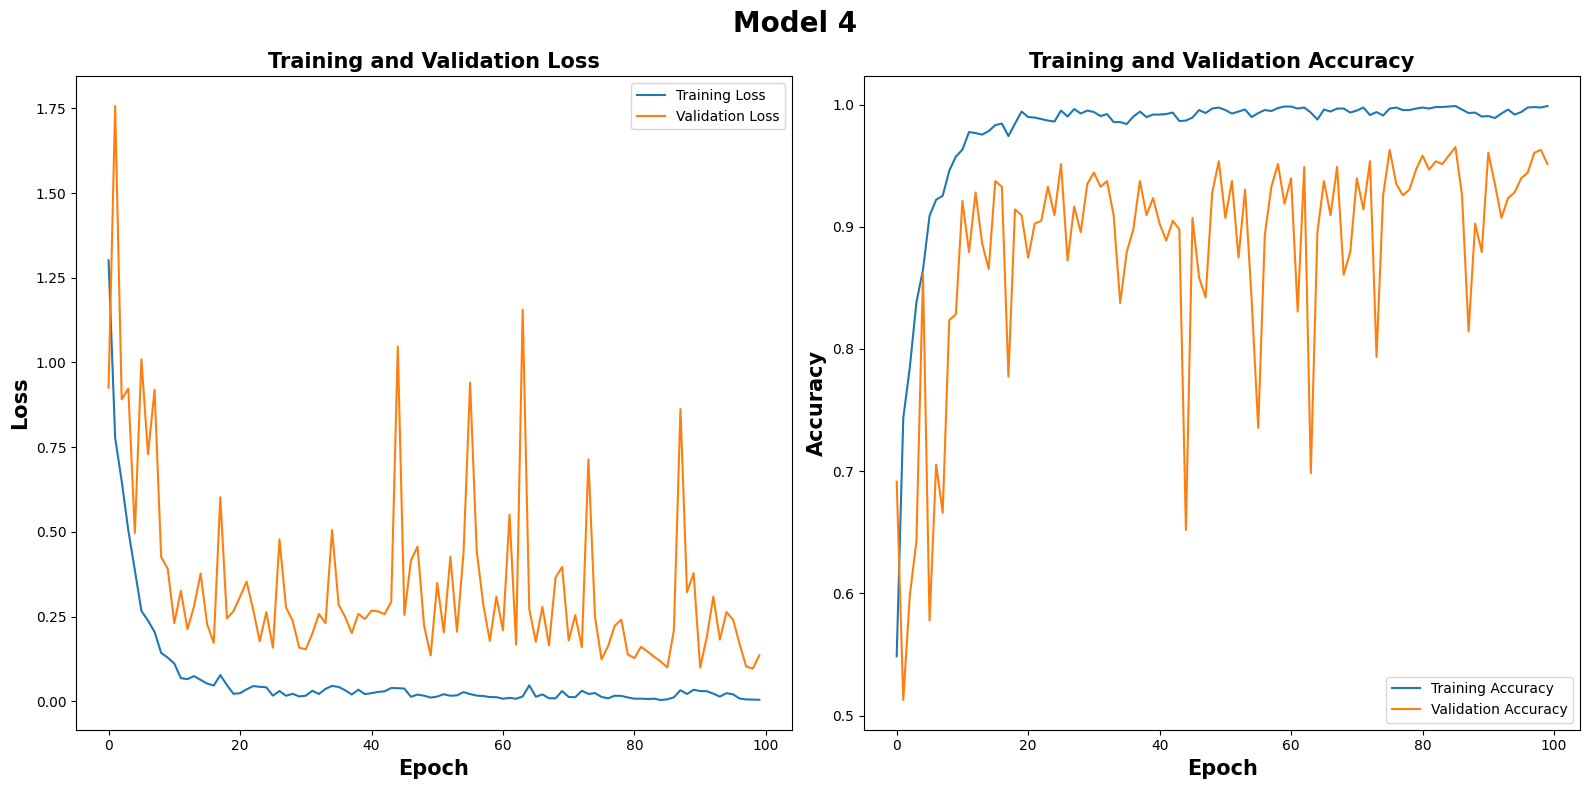

In [61]:
import matplotlib.pyplot as plt

# Drawing the training and validation graphs, loss and accuracy
# Design the figure and the 1x2 grid of subplots as we want it
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Drawing the training and validation loss which will be on the first subplot
fig.suptitle('Model 4', fontsize=20, fontweight='bold')


ax1.plot(history4.history['loss'], label='Training Loss')
ax1.plot(history4.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss',fontsize=15, fontweight='bold')
ax1.set_xlabel('Epoch',fontsize=15, fontweight='bold')
ax1.set_ylabel('Loss',fontsize=15, fontweight='bold')
ax1.legend()

# Drawing the training and validation accuracy that will be on the second subplot
ax2.plot(history4.history['accuracy'], label='Training Accuracy')
ax2.plot(history4.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy',fontsize=15, fontweight='bold')
ax2.set_xlabel('Epoch',fontsize=15, fontweight='bold')
ax2.set_ylabel('Accuracy',fontsize=15, fontweight='bold')
ax2.legend()

# Save the figure as an image file
plt.savefig('model4_performance.png')

# Visualize the designed plots
plt.tight_layout()
plt.show()


### Testing and evaluating 

In [62]:
# finding the validation accuracy of the model 4 on the validation dataset
val_loss, val_acc = model4.evaluate(X_val, Y_val) 
print("The validation accuracy is: {:.2f}%".format(val_acc * 100))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9602 - loss: 0.1222
The validation accuracy is: 95.13%


In [63]:
# finding the accuracy of the model 4 on the test dataset
val_loss, val_acc = model4.evaluate(X_test, Y_test) 
print("The accuracy is: {:.2f}%".format(val_acc * 100))

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5186 - loss: 2.8561

2024-06-17 20:54:27.021094: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.85999, expected 3.04092
2024-06-17 20:54:27.021162: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.9959, expected 5.17684
2024-06-17 20:54:27.021176: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.02419, expected 5.20513
2024-06-17 20:54:27.021189: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.1029, expected 4.28384
2024-06-17 20:54:27.021207: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.88838, expected 5.06932
2024-06-17 20:54:27.021220: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.87774, expected 5.05868
2024-06-17 20:54:27.021231: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.01906, expected 6.2
2024-06-17 20:54:27.021242: E external/local_xla/xla/service/

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 348ms/step - accuracy: 0.5705 - loss: 2.5181
The accuracy is: 76.14%


In [64]:
# Predictions
y_pred_prob = model4.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step


In [65]:
# Confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)
cm

array([[ 23,  38,  34,   5],
       [  0, 112,   3,   0],
       [  2,   0, 103,   0],
       [  0,   6,   6,  62]])

In [66]:
#accuracy
accuracy = accuracy_score(np.argmax(Y_test, axis=1), y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

Accuracy: 76.14213197969542


In [67]:
# Precision
precision = precision_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.8048656268278034


In [68]:
# Recall
recall = recall_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.7614213197969543


In [69]:
# F-score
f_score = f1_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("F-Score:", f_score)

F-Score: 0.7185499074687399


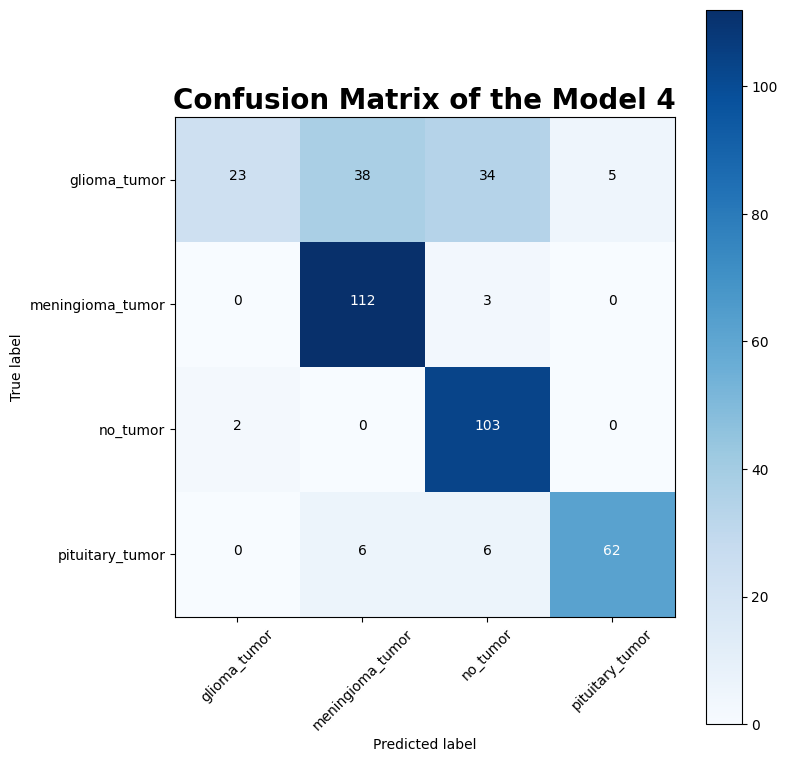

In [70]:
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of the Model 4', fontsize=20, fontweight='bold')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    # Save the figure as an image file
plt.savefig('model4_Matrixperformance.png')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## e. Model 5: EfficientNetB0-based Transfer Learning model 

In [71]:
# Load the EfficientNetB0 model with pre-trained ImageNet weights, excluding the top layers
effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Build the model5
model5_input = effnet.input
model5_output = effnet.output
model5_output = GlobalAveragePooling2D()(model5_output)
model5_output = Dropout(rate=0.5)(model5_output)
# Adding a dense layer with 128 neurons and a relu activation
model5_output = Dense(128, activation='relu')(model5_output) 
# Adding a dropout layer of 50% with the final dense layer
model5_output = Dropout(rate=0.5)(model5_output)  
model5_output = Dense(4, activation='softmax')(model5_output)

# Create the final model
model5 = Model(inputs=model5_input, outputs=model5_output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Compliling the model 5

In [72]:
# Compile the model1
model5.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

### Printing the model 5 summary

In [73]:
# Print the summary of the model1
model5.summary()

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 150, 150,  │          0 │ input_layer_5[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 150, 150,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 150, 150,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 4,172,032 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

### Training the model 5

In [74]:
# Fit the model1 to the training data
history5 = model5.fit(X_train, Y_train, epochs=100, batch_size=32,  validation_data=(X_val, Y_val))    

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 162s 937ms/step - accuracy: 0.3696 - loss: 1.3566 - val_accuracy: 0.2947 - val_loss: 1.4583
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.7717 - loss: 0.6481 - val_accuracy: 0.1346 - val_loss: 1.5189
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.8487 - loss: 0.4219 - val_accuracy: 0.1346 - val_loss: 1.6335
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9074 - loss: 0.2854 - val_accuracy: 0.1346 - val_loss: 1.8830
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9359 - loss: 0.2117 - val_accuracy: 0.1346 - val_loss: 1.9266
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9509 - loss: 0.1553 - val_accuracy: 0.1346 - val_loss: 2.1800
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9678 - loss: 0.1061 - val_accuracy: 0.1369 - val_loss: 2.0919
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9715 - loss: 0.0768 - val_accuracy

### Plotting the training and validation loss & accuracy

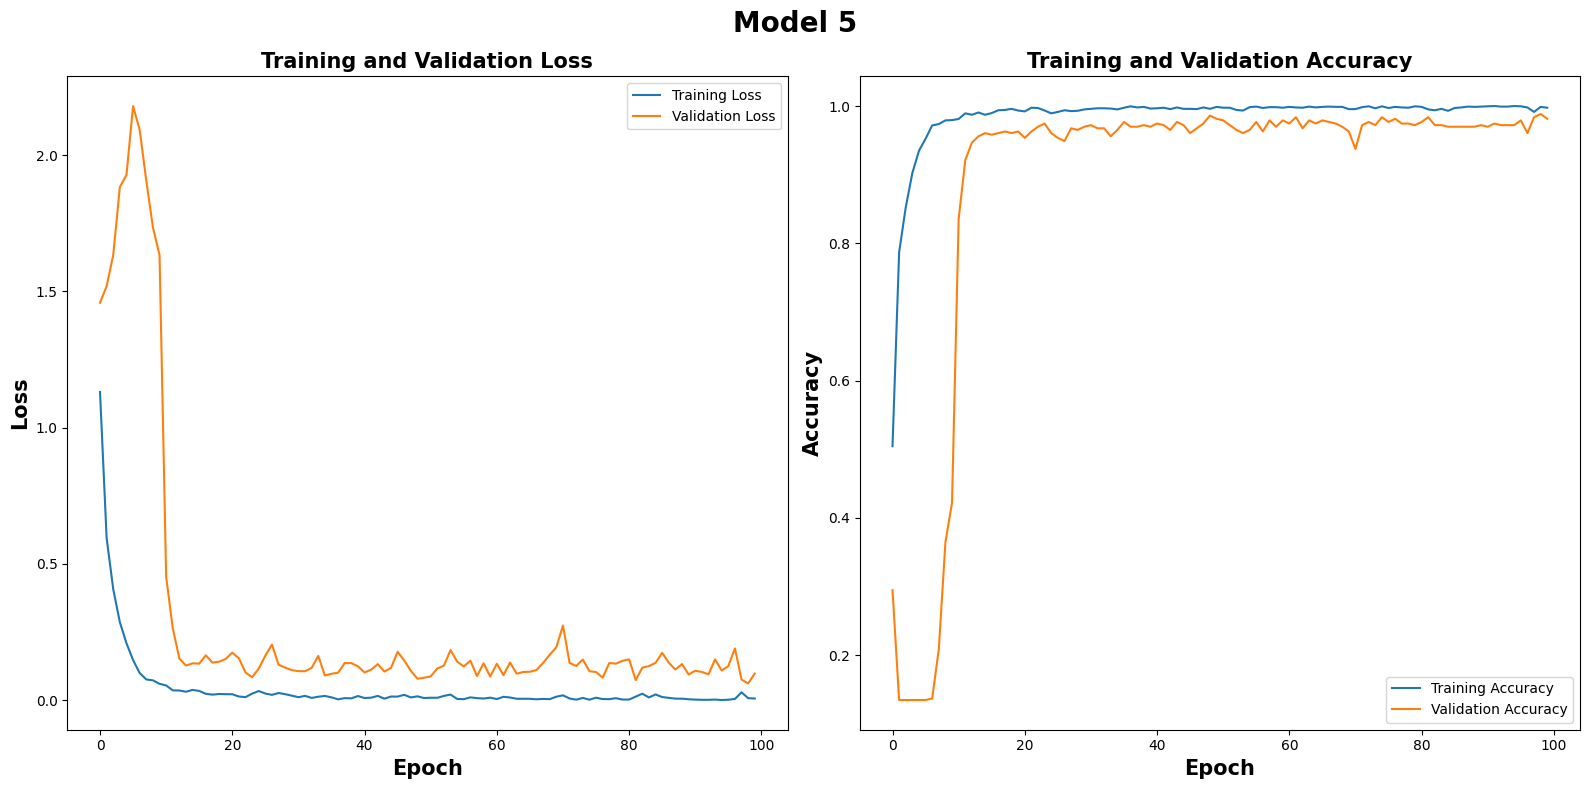

In [75]:
import matplotlib.pyplot as plt

# Drawing the training and validation graphs, loss and accuracy
# Design the figure and the 1x2 grid of subplots as we want it
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Drawing the training and validation loss which will be on the first subplot

fig.suptitle('Model 5', fontsize=20, fontweight='bold')


ax1.plot(history5.history['loss'], label='Training Loss')
ax1.plot(history5.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss',fontsize=15, fontweight='bold')
ax1.set_xlabel('Epoch',fontsize=15, fontweight='bold')
ax1.set_ylabel('Loss',fontsize=15, fontweight='bold')
ax1.legend()

# Drawing the training and validation accuracy that will be on the second subplot
ax2.plot(history5.history['accuracy'], label='Training Accuracy')
ax2.plot(history5.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy',fontsize=15, fontweight='bold')
ax2.set_xlabel('Epoch',fontsize=15, fontweight='bold')
ax2.set_ylabel('Accuracy',fontsize=15, fontweight='bold')
ax2.legend()

# Save the figure as an image file
plt.savefig('model5_performance.png')

# Visualize the designed plots
plt.tight_layout()
plt.show()


### Testing and evaluation of the model 5

In [76]:
# finding the validation accuracy of the mode5 1 on the validation dataset
val_loss, val_acc = model5.evaluate(X_val, Y_val) 
print("The validation accuracy is: {:.2f}%".format(val_acc * 100))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9833 - loss: 0.1028
The validation accuracy is: 98.14%


In [77]:
# finding the accuracy of the model 5 on the test dataset
val_loss, val_acc = model5.evaluate(X_test, Y_test) 
print("The accuracy is: {:.2f}%".format(val_acc * 100))

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 485ms/step - accuracy: 0.6126 - loss: 3.5002
The accuracy is: 77.66%


In [78]:
# Predictions
y_pred_prob = model5.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 536ms/step


In [79]:
# Confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)
cm

array([[ 31,  35,  34,   0],
       [  0, 112,   3,   0],
       [  0,   0, 105,   0],
       [  0,   5,  11,  58]])

In [80]:
#accuracy
accuracy = accuracy_score(np.argmax(Y_test, axis=1), y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

Accuracy: 77.66497461928934


In [81]:
# Precision
precision = precision_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.8395829077022207


In [82]:
# Recall
recall = recall_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.7766497461928934


In [83]:
# F-score
f_score = f1_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')
print("F-Score:", f_score)

F-Score: 0.7469620922163595


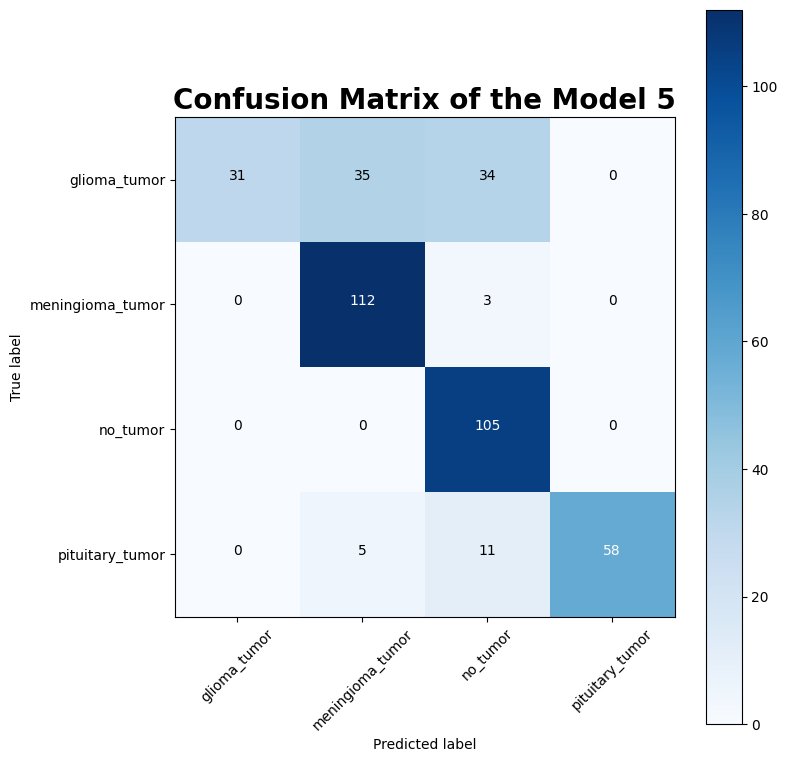

In [84]:
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of the Model 5', fontsize=20, fontweight='bold')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    # Save the figure as an image file
plt.savefig('model5_Matrixperformance.png')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 

# 6. Saving the best performed model

In [85]:
# Save the trained model
model5.save('brain_tumor_cnn_model.h5')

# 7. Dashboard implimentation 

As a simple example to demonstrate how our brain tumor detection model can be deployed and utilized in a real case scenario, an interactive dashboard is developed. 

In [ ]:
import os
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import base64
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
import io

# Load the pre-trained CNN model
model = load_model('brain_tumor_cnn_model.h5')  # Update with your model file path

# Initialize the Dash app
app = dash.Dash(__name__)

# Define custom CSS styles
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css']

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Brain Tumor Detection Dashboard", style={'textAlign': 'center', 'color': 'blue', 'margin-top': '30px'}),
    
    dcc.Upload(
        id='upload-image',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select an MRI Brain Image', style={'color': 'green'})
        ]),
        style={
            'width': '50%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '2px',
            'borderStyle': 'dashed',
            'borderColor': 'gray',
            'borderRadius': '10px',
            'textAlign': 'center',
            'margin': '30px auto'  # Center the upload component
        },
        multiple=False
    ),
    
    html.Div(id='output-container-upload', style={'textAlign': 'center', 'margin-top': '30px'})  # Center the output container
])

# Define a function to decode and process the uploaded image
def decode_and_predict_image(contents):
    _, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)
    image = Image.open(io.BytesIO(decoded))
    image = image.resize((150, 150))  # Resize image to match model input shape
    image = np.array(image) / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)[0]  # Make prediction
    return prediction, decoded

# Define callback to process uploaded image and make prediction
@app.callback(
    Output('output-container-upload', 'children'),
    [Input('upload-image', 'contents')],
    [State('upload-image', 'filename')]
)
def update_output(contents, filename):
    if contents is not None:
        prediction, image_data = decode_and_predict_image(contents)
        
        classes = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
        predicted_class_index = np.argmax(prediction)
        predicted_class = classes[predicted_class_index]
        confidence = prediction[predicted_class_index] * 100
        
        result = f'Prediction: {predicted_class.replace("_", " ").title()}'
        confidence_text = f'Confidence: {confidence:.2f}%'
        result_color = 'red' if predicted_class != "no_tumor" else 'green'
        
        return html.Div([
            html.Img(src=contents, style={'height': '300px', 'margin': '10px auto'}),  # Display uploaded image
            html.H4(result, style={'color': result_color}),
            html.H5(confidence_text, style={'color': result_color})
        ])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8050, host='127.0.0.1', use_reloader=False, threaded=True)
